<a href="https://colab.research.google.com/github/yj9889/ESAA2/blob/main/220530%EC%9D%98%EB%A5%98%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## 패션 MNIST 데이터셋 임포트하기
10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋

load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

레이블	클래스

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

각 이미지는 하나의 레이블에 매핑되어 있습니다. 

데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels) #0~9 사이 정수

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

## 데이터 전처리
네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

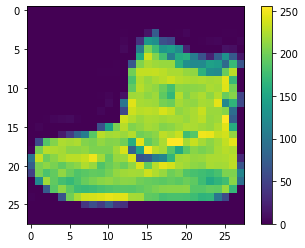

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 

훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름 출력

데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

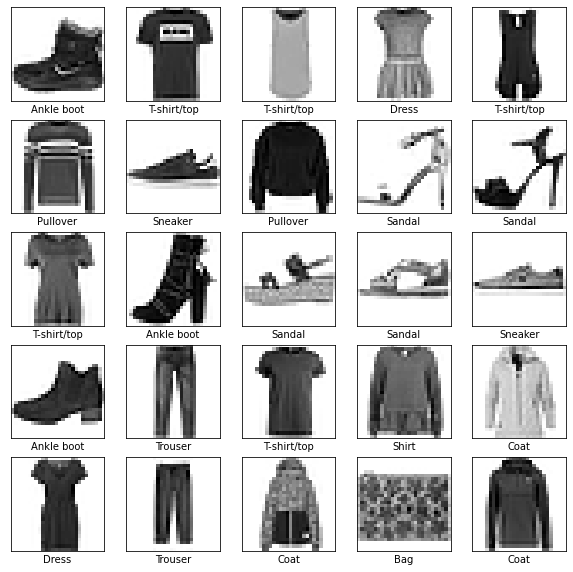

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성
신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 층 설정
*tf.keras.layers.Dense*와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됨.

첫 번째 층인 *tf.keras.layers.Flatten*은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환

픽셀을 펼친 후에는 두 개의 *tf.keras.layers.Dens* 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 

첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

### 모델 컴파일
* 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
* 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
* 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련
1. 훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인합니다.

### 모델 피드
model.fit 메서드 호출

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5054 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3799 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3421 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3142 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2842 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2703 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2578 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2513 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.241

### 정확도 평가

테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 

훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문입니다. 

과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3330 - accuracy: 0.8846 - 490ms/epoch - 2ms/step

Test accuracy: 0.8845999836921692


### 예측하기
모델의 선형 출력, 로짓. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

10개의 옷 품목에 상응하는 모델의 신뢰도를 나타냄.

In [ ]:
predictions[0]

array([1.40411038e-09, 4.08523354e-11, 3.42847334e-10, 1.16079965e-10,
       1.72929629e-10, 1.13056973e-03, 6.67043736e-08, 6.62513729e-03,
       1.04888272e-07, 9.92244065e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보죠.

In [ ]:
test_labels[0]

9

10개 클래스에 대한 예측을 모두 그래프로 표현

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인
0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

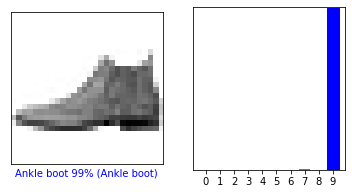

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

12번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

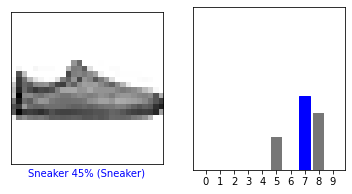

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

몇 개의 이미지의 예측을 출력해 보죠. 

올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 

숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다.

신뢰도 점수가 높을 때에도 잘못 예측할 수 있음.

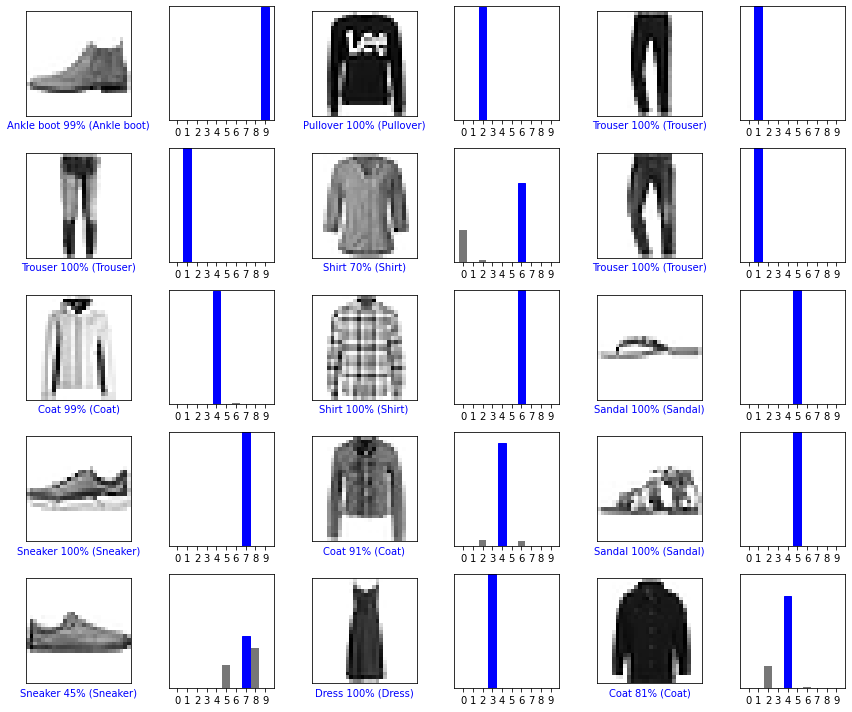

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기


In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 

하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


이 이미지에 대한 예측 수행

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.5658358e-05 3.6537890e-09 9.9865109e-01 1.7476763e-08 9.4267080e-04
  2.3924890e-11 3.5056769e-04 2.0304932e-16 2.8650067e-08 6.1088023e-12]]


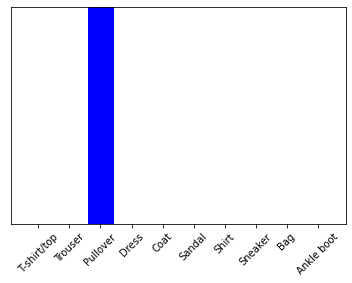

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

*tf.keras.Model.predict*는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환합니다. 

배치에서 (유일한) 이미지에 대한 예측을 가져옵니다.

예상과 같이 모델이 레이블을 예측하는 결과.

In [ ]:
np.argmax(predictions_single[0])

2